# Predicting Customer Attrition in Banking

Load the Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.initializers import HeNormal 

Load the dataset

In [81]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\SENAPATI SIR FSDS NOTE\NOVEMBER MONTH DS NOTE\6th, 7th- ANN THEORY, Installation\Churn_Modelling (1).csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df.shape

(10000, 14)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [87]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Convert categorical data to neumerical data

In [88]:
encoder = ce.BinaryEncoder(cols = ["Surname","Geography","Gender"])
df = encoder.fit_transform(df)

In [89]:
df.head()

,RowNumber,CustomerId,Surname_0,Surname_1,Surname_2,Surname_3,Surname_4,Surname_5,Surname_6,Surname_7,Surname_8,Surname_9,Surname_10,Surname_11,CreditScore,Geography_0,Geography_1,Gender_0,Gender_1,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0,0,0,0,0,0,0,0,0,0,0,1,619,0,1,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,0,0,0,0,0,0,0,0,0,0,1,0,608,1,0,0,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,0,0,0,0,0,0,0,0,0,0,1,1,502,0,1,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,0,0,0,0,0,0,0,0,0,1,0,0,699,0,1,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,0,0,0,0,0,0,0,0,0,1,0,1,850,1,0,0,1,43,2,125510.82,1,1,1,79084.10,0


In [90]:
df.drop(['RowNumber','CustomerId'],axis = 1,inplace=True)

In [91]:
df.head()

,Surname_0,Surname_1,Surname_2,Surname_3,Surname_4,Surname_5,Surname_6,Surname_7,Surname_8,Surname_9,Surname_10,Surname_11,CreditScore,Geography_0,Geography_1,Gender_0,Gender_1,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,0,0,0,0,0,0,0,0,1,619,0,1,0,1,42,2,0.00,1,1,1,101348.88,1
1,0,0,0,0,0,0,0,0,0,0,1,0,608,1,0,0,1,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,0,0,0,0,0,0,0,1,1,502,0,1,0,1,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,0,0,0,0,0,0,1,0,0,699,0,1,0,1,39,1,0.00,2,0,0,93826.63,0
4,0,0,0,0,0,0,0,0,0,1,0,1,850,1,0,0,1,43,2,125510.82,1,1,1,79084.10,0


Normalize the data

In [92]:
df.shape

(10000, 25)

In [93]:
# normalize only the neumerical data
scaler = MinMaxScaler()
new_df = scaler.fit_transform(df.iloc[:,0:24])

In [94]:
df.iloc[:,0:24] = pd.DataFrame(new_df,columns=df.iloc[:,0:24].columns)

C:\Users\HP\AppData\Local\Temp\ipykernel_19216\2134594392.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Surname_0, Length: 10000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,0:24] = pd.DataFrame(new_df,columns=df.iloc[:,0:24].columns)
C:\Users\HP\AppData\Local\Temp\ipykernel_19216\2134594392.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    1.0
9999    0.0
Name: Surname_1, Length: 10000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,0:24] = pd.DataFr

In [95]:
new_df

array([[0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.46442905],
       [0.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.19091423]], shape=(10000, 24))

Split the dataset to Dependent and Independent variable

In [96]:
x = df.iloc[:,:24]
y = df.iloc[:,24:]

In [97]:
x

,Surname_0,Surname_1,Surname_2,Surname_3,Surname_4,Surname_5,Surname_6,Surname_7,Surname_8,Surname_9,Surname_10,Surname_11,CreditScore,Geography_0,Geography_1,Gender_0,Gender_1,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.538,0.0,1.0,0.0,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.516,1.0,0.0,0.0,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.304,0.0,1.0,0.0,1.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.698,0.0,1.0,0.0,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.000,1.0,0.0,0.0,1.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.842,0.0,1.0,1.0,0.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341
9996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.332,0.0,1.0,1.0,0.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490
9997,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.718,0.0,1.0,0.0,1.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390
9998,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.844,1.0,1.0,1.0,0.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429


In [98]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [99]:
print(f'the shape of x is :{x.shape}')
print(f'the shape of y is :{y.shape}')

the shape of x is :(10000, 24)
the shape of y is :(10000, 1)


Split the dataset to traning and testing set

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [101]:
print(f'The shape of x_train is : {x_train.shape}')
print(f'The shape of y_train is : {y_train.shape}')
print(f'The shape of x_test is : {x_test.shape}')
print(f'The shape of y_test is : {y_test.shape}')

The shape of x_train is : (6700, 24)
The shape of y_train is : (6700, 1)
The shape of x_test is : (3300, 24)
The shape of y_test is : (3300, 1)


Building ANN

In [102]:
x.columns.shape[0]
#x.columns.shape[0] means “the total number of columns in the DataFrame x.

24

In [103]:
x.shape[1]

24

In [104]:
x.head()

,Surname_0,Surname_1,Surname_2,Surname_3,Surname_4,Surname_5,Surname_6,Surname_7,Surname_8,Surname_9,Surname_10,Surname_11,CreditScore,Geography_0,Geography_1,Gender_0,Gender_1,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.538,0.0,1.0,0.0,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.516,1.0,0.0,0.0,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.304,0.0,1.0,0.0,1.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.698,0.0,1.0,0.0,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.000,1.0,0.0,0.0,1.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [105]:
# The problem is a classification problem loss function : binary cross entropy or hinge loss
model = Sequential()
# inpu layer
model.add(Dense(64,activation='relu',input_dim = x.columns.shape[0],name = "Layer1",kernel_initializer=HeNormal()))
# hidden layer
model.add(Dense(32,activation='relu',name = "Layer2",kernel_initializer=HeNormal()))
model.add(Dense(32,activation='relu',name = "Layer3",kernel_initializer=HeNormal()))
model.add(Dense(16,activation='relu',name = "Layer4",kernel_initializer=HeNormal()))
model.add(Dense(16,activation='relu',name = "Layer5",kernel_initializer=HeNormal()))
model.add(Dense(8,activation='relu',name = 'Layer6',kernel_initializer=HeNormal()))
# output layer
model.add(Dense(1,activation = 'sigmoid',name = 'Layer7',kernel_initializer=HeNormal()))

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 🔹 1. Problem Type

```python
# The problem is a classification problem
# loss function : binary cross entropy or hinge loss
```

✅ You’re dealing with a **binary classification** problem — predicting one of two outcomes (like *churn or not churn*, *yes or no*, *0 or 1*).
Hence, your output layer will use:

* **`sigmoid` activation**
* And a **binary loss function**, e.g.:

  * `binary_crossentropy` (most common)
  * or `hinge` (used sometimes for SVM-like classification).

---

### 🔹 2. Creating the Model

```python
model = Sequential()
```

* You’re building a **Sequential model** — meaning layers are stacked one after another in order.
* This is the most straightforward type of model in Keras.

---

### 🔹 3. Input Layer (Layer 1)

```python
model.add(Dense(64, activation='relu', input_dim=x.columns.shape[0], name="Layer1", kernel_initializer=HeNormal()))
```

* **`Dense(64)`** → 64 neurons (fully connected layer).
* **`activation='relu'`** → introduces non-linearity (helps the model learn complex patterns).
* **`input_dim=x.columns.shape[0]`** → number of input features (columns in your dataset `x`).
* **`kernel_initializer=HeNormal()`** → initializes weights using **He Normal initialization**, which works well with ReLU activations.
* **`name="Layer1"`** → gives this layer a name for easier debugging and visualization.

---

### 🔹 4. Hidden Layers

```python
model.add(Dense(32, activation='relu', name="Layer2", kernel_initializer=HeNormal()))
model.add(Dense(32, activation='relu', name="Layer3", kernel_initializer=HeNormal()))
model.add(Dense(16, activation='relu', name="Layer4", kernel_initializer=HeNormal()))
model.add(Dense(16, activation='relu', name="Layer5", kernel_initializer=HeNormal()))
model.add(Dense(8, activation='relu', name='Layer6', kernel_initializer=HeNormal()))
```

These are your **hidden layers**.

* Each layer reduces the number of neurons, helping the model **compress and abstract** information gradually.
* All use **ReLU activation**, which helps avoid vanishing gradient problems and improves training efficiency.
* **HeNormal** initialization complements ReLU by setting initial weights suitable for deep networks.

---

### 🔹 5. Output Layer

```python
model.add(Dense(1, activation='sigmoid', name='Layer7', kernel_initializer=HeNormal()))
```

* **`Dense(1)`** → only one neuron (for binary output).
* **`activation='sigmoid'`** → outputs a probability between 0 and 1 (for classes 0 and 1).
* This layer is perfect for **binary classification**.

---

### 🔹 6. Summary of Architecture

| Layer | Type  | Neurons | Activation | Notes       |
| ----- | ----- | ------- | ---------- | ----------- |
| 1     | Dense | 64      | ReLU       | Input layer |
| 2     | Dense | 32      | ReLU       | Hidden      |
| 3     | Dense | 32      | ReLU       | Hidden      |
| 4     | Dense | 16      | ReLU       | Hidden      |
| 5     | Dense | 16      | ReLU       | Hidden      |
| 6     | Dense | 8       | ReLU       | Hidden      |
| 7     | Dense | 1       | Sigmoid    | Output      |

---

### 🔹 7. What the Model Does

✅ This neural network:

* Takes **feature data (`x`)** as input.
* Passes it through **multiple hidden layers** to learn representations.
* Outputs a **single probability** value (e.g. how likely a customer is to churn).

---

### 🔹 8. Typical Next Steps

After this model definition, you’ll usually:

```python
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.2)
```

---

### ✅ **In summary:**

This code builds a **deep neural network** with **7 layers** for a **binary classification problem**, using:

* ReLU for hidden layers,
* Sigmoid for output,
* HeNormal initialization for better weight distribution.



In [106]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                  │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer2 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer3 (Dense)                  │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer4 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer5 (Dense)                  │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer6 (Dense)                  │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer7 (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,681 (22.19 KB)

 Trainable params: 5,681 (22.19 KB)

 Non-trainable params: 0 (0.00 B)

| **Layer**          | **Type**                | **Output Shape** | **Parameters** | **Explanation**                                                                                                                     |
| ------------------ | ----------------------- | ---------------- | -------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| **Layer1 (Dense)** | Fully Connected (Dense) | (None, 64)       | **1,600**      | The first hidden layer. Takes input features (25 columns → 24 features + bias = 25×64 = 1,600). Each neuron connects to all inputs. |
| **Layer2 (Dense)** | Dense                   | (None, 32)       | **2,080**      | Second hidden layer: 64 inputs × 32 neurons + 32 biases = 2,080 parameters.                                                         |
| **Layer3 (Dense)** | Dense                   | (None, 32)       | **1,056**      | Third hidden layer: 32 inputs × 32 neurons + 32 biases = 1,056 parameters.                                                          |
| **Layer4 (Dense)** | Dense                   | (None, 16)       | **528**        | Fourth hidden layer: 32 inputs × 16 neurons + 16 biases = 528 parameters.                                                           |
| **Layer5 (Dense)** | Dense                   | (None, 16)       | **272**        | Fifth hidden layer: 16 inputs × 16 neurons + 16 biases = 272 parameters.                                                            |
| **Layer6 (Dense)** | Dense                   | (None, 8)        | **136**        | Sixth hidden layer: 16 inputs × 8 neurons + 8 biases = 136 parameters.                                                              |
| **Layer7 (Dense)** | Dense (Output Layer)    | (None, 1)        | **9**          | Output layer: 8 inputs × 1 neuron + 1 bias = 9 parameters. Produces the final probability output.                                   |


Parameters=(Number of inputs×Number of neurons)+Number of biases

The bias count equals the number of neurons in that layer.

Each neuron has 1 bias value.

In [107]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss = 'binary_crossentropy',metrics=['accuracy'],optimizer=optimizer)
history1 = model.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7549 - loss: 0.5461 - val_accuracy: 0.7978 - val_loss: 0.4802
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.4806 - val_accuracy: 0.7978 - val_loss: 0.4875
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.4643 - val_accuracy: 0.7978 - val_loss: 0.4559
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.4598 - val_accuracy: 0.7978 - val_loss: 0.4449
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.4509 - val_accuracy: 0.7978 - val_loss: 0.4397
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.4472 - val_accuracy: 0.7978 - val_loss: 0.4305
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.4398 - val_accuracy: 0.7978 - val_loss: 0.4332
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7970 - loss: 0.4254 - val_accuracy: 0.8149 - val_loss:

plot the traning and validation accuracy

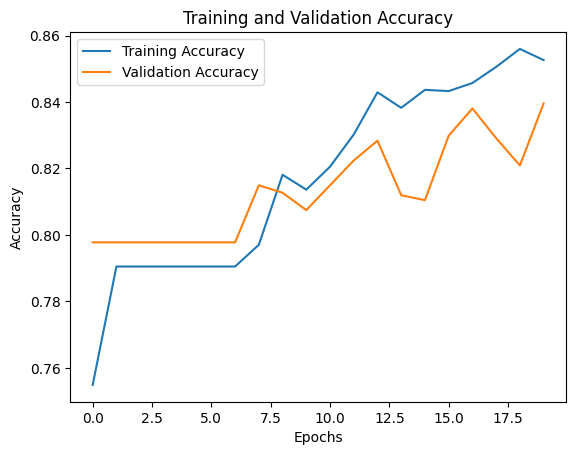

In [108]:
plt.plot(history1.history['accuracy'],label = 'Training Accuracy')
plt.plot(history1.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [109]:
model.evaluate(x_test,y_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8476 - loss: 0.3781


[0.3781316578388214, 0.8475757837295532]

Early Stopping

In [110]:
from tensorflow import keras

callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Watch validation loss
    min_delta=0.0001,            # Minimum change to qualify as improvement
    patience=10,                 # Stop after 10 epochs with no improvement
    verbose=1,                   # Print when stopping
    mode='auto',                 # 'auto', 'min', or 'max'
    baseline=None,               # Optional reference value
    restore_best_weights=False,  # Restore model weights from best epoch
    start_from_epoch=0           # Start checking from first epoch
)

history2 = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.2,
    callbacks=[callback]
)


Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8593 - loss: 0.3423 - val_accuracy: 0.8187 - val_loss: 0.4022
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8621 - loss: 0.3343 - val_accuracy: 0.8418 - val_loss: 0.4028
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8659 - loss: 0.3282 - val_accuracy: 0.8299 - val_loss: 0.4011
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8687 - loss: 0.3241 - val_accuracy: 0.8366 - val_loss: 0.4224
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8681 - loss: 0.3162 - val_accuracy: 0.8366 - val_loss: 0.4112
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8729 - loss: 0.3051 - val_accuracy: 0.8164 - val_loss: 0.4168
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8750 - loss: 0.2994 - val_accuracy: 0.8433 - val_loss: 0.4340
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8731 - loss: 0.3029 - val_accuracy: 0.8358 - val_loss:

plot taning and validation accuracy

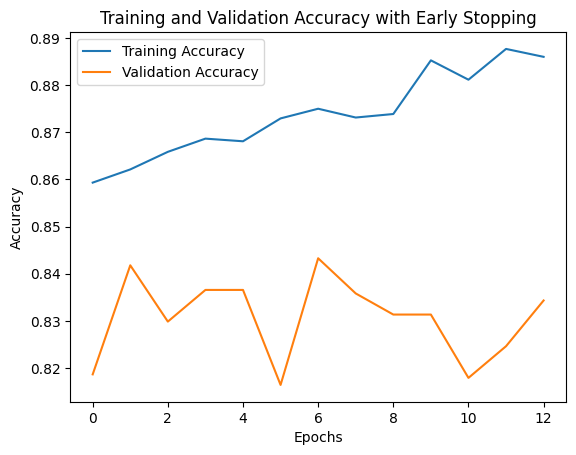

In [111]:
plt.plot(history2.history['accuracy'],label = 'Training Accuracy')
plt.plot(history2.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  
plt.legend()
plt.show()

In [112]:
model.evaluate(x_test,y_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8382 - loss: 0.4687


[0.46867212653160095, 0.8381817936897278]

Using L2 Regularization

In [113]:
from tensorflow.keras.regularizers import l2
model1 = keras.Sequential()
model1.add(Dense(64,activation='relu',input_dim=x.columns.shape[0],name="Layer1",kernel_initializer=HeNormal()
                 ,kernel_regularizer=l2(0.001)))
model1.add(Dense(32,activation='relu',name="Layer2",kernel_initializer=HeNormal()
                ,kernel_regularizer=l2(0.001)))
model1.add(Dense(16,activation='relu',name="Layer3",kernel_initializer=HeNormal()
                ,kernel_regularizer=l2(0.001)))
model1.add(Dense(8,activation='relu',name="Layer4",kernel_initializer=HeNormal()
                ,kernel_regularizer=l2(0.001)))
model1.add(Dense(1,activation='sigmoid',name="Layer5",kernel_initializer=HeNormal()
                ,kernel_regularizer=l2(0.001)))

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


kernel_regularizer=l2(0.001) — adds a penalty equal to 0.001 * sum(square(weights)) to the loss function.

This means the model not only tries to fit the data but also tries to keep weights small, preventing overfitting.

In [115]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=opt)
history3 = model1.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7905 - loss: 0.6270 - val_accuracy: 0.7978 - val_loss: 0.5270
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.5156 - val_accuracy: 0.7978 - val_loss: 0.4812
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.4972 - val_accuracy: 0.7978 - val_loss: 0.4964
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7938 - loss: 0.4786 - val_accuracy: 0.8187 - val_loss: 0.4601
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8035 - loss: 0.4750 - val_accuracy: 0.8052 - val_loss: 0.4569
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8052 - loss: 0.4723 - val_accuracy: 0.8231 - val_loss: 0.4508
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8121 - loss: 0.4680 - val_accuracy: 0.8172 - val_loss: 0.4695
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8129 - loss: 0.4616 - val_accuracy: 0.8164 - val_loss:

plot the traning and validation accuracy

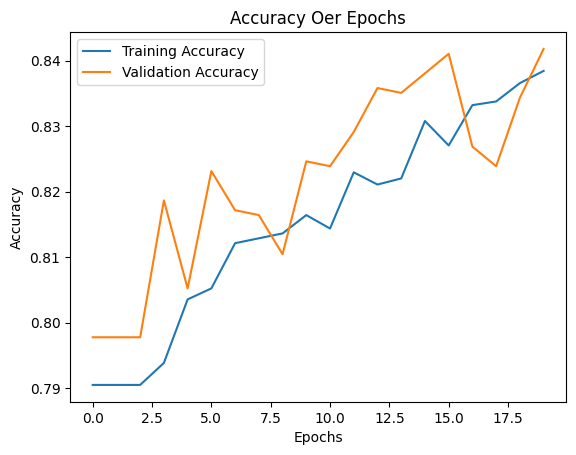

In [116]:
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Oer Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [117]:
model.evaluate(x_test,y_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8382 - loss: 0.4687


[0.46867212653160095, 0.8381817936897278]